# Regression

### Importing Required Libraries

In [ ]:
# Load libraries
import pandas as pd
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Diabetes dataset

In [ ]:
# Pima Indians Diabetes Database
# Predict the onset of diabetes based on diagnostic measures
# https://www.kaggle.com/uciml/pima-indians-diabetes-database

# load dataset
pima = pd.read_csv("diabetes.csv")

In [ ]:
pima.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
pima.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


### Data exploration
- Plot the correlation matrix and correlogram of the Diabetes dataset.

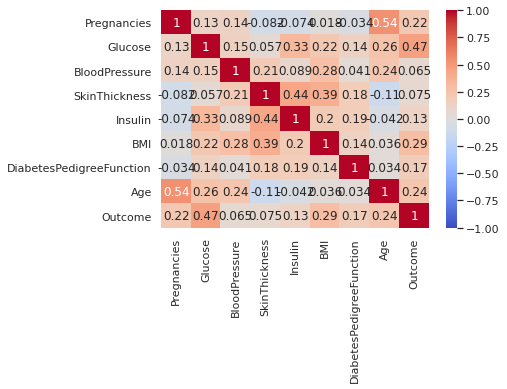

In [ ]:
## Correlation Matrix
sns.set(style="white")

# Compute the correlation matrix
corr = pima.corr()

sns.heatmap(corr, annot = True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm')


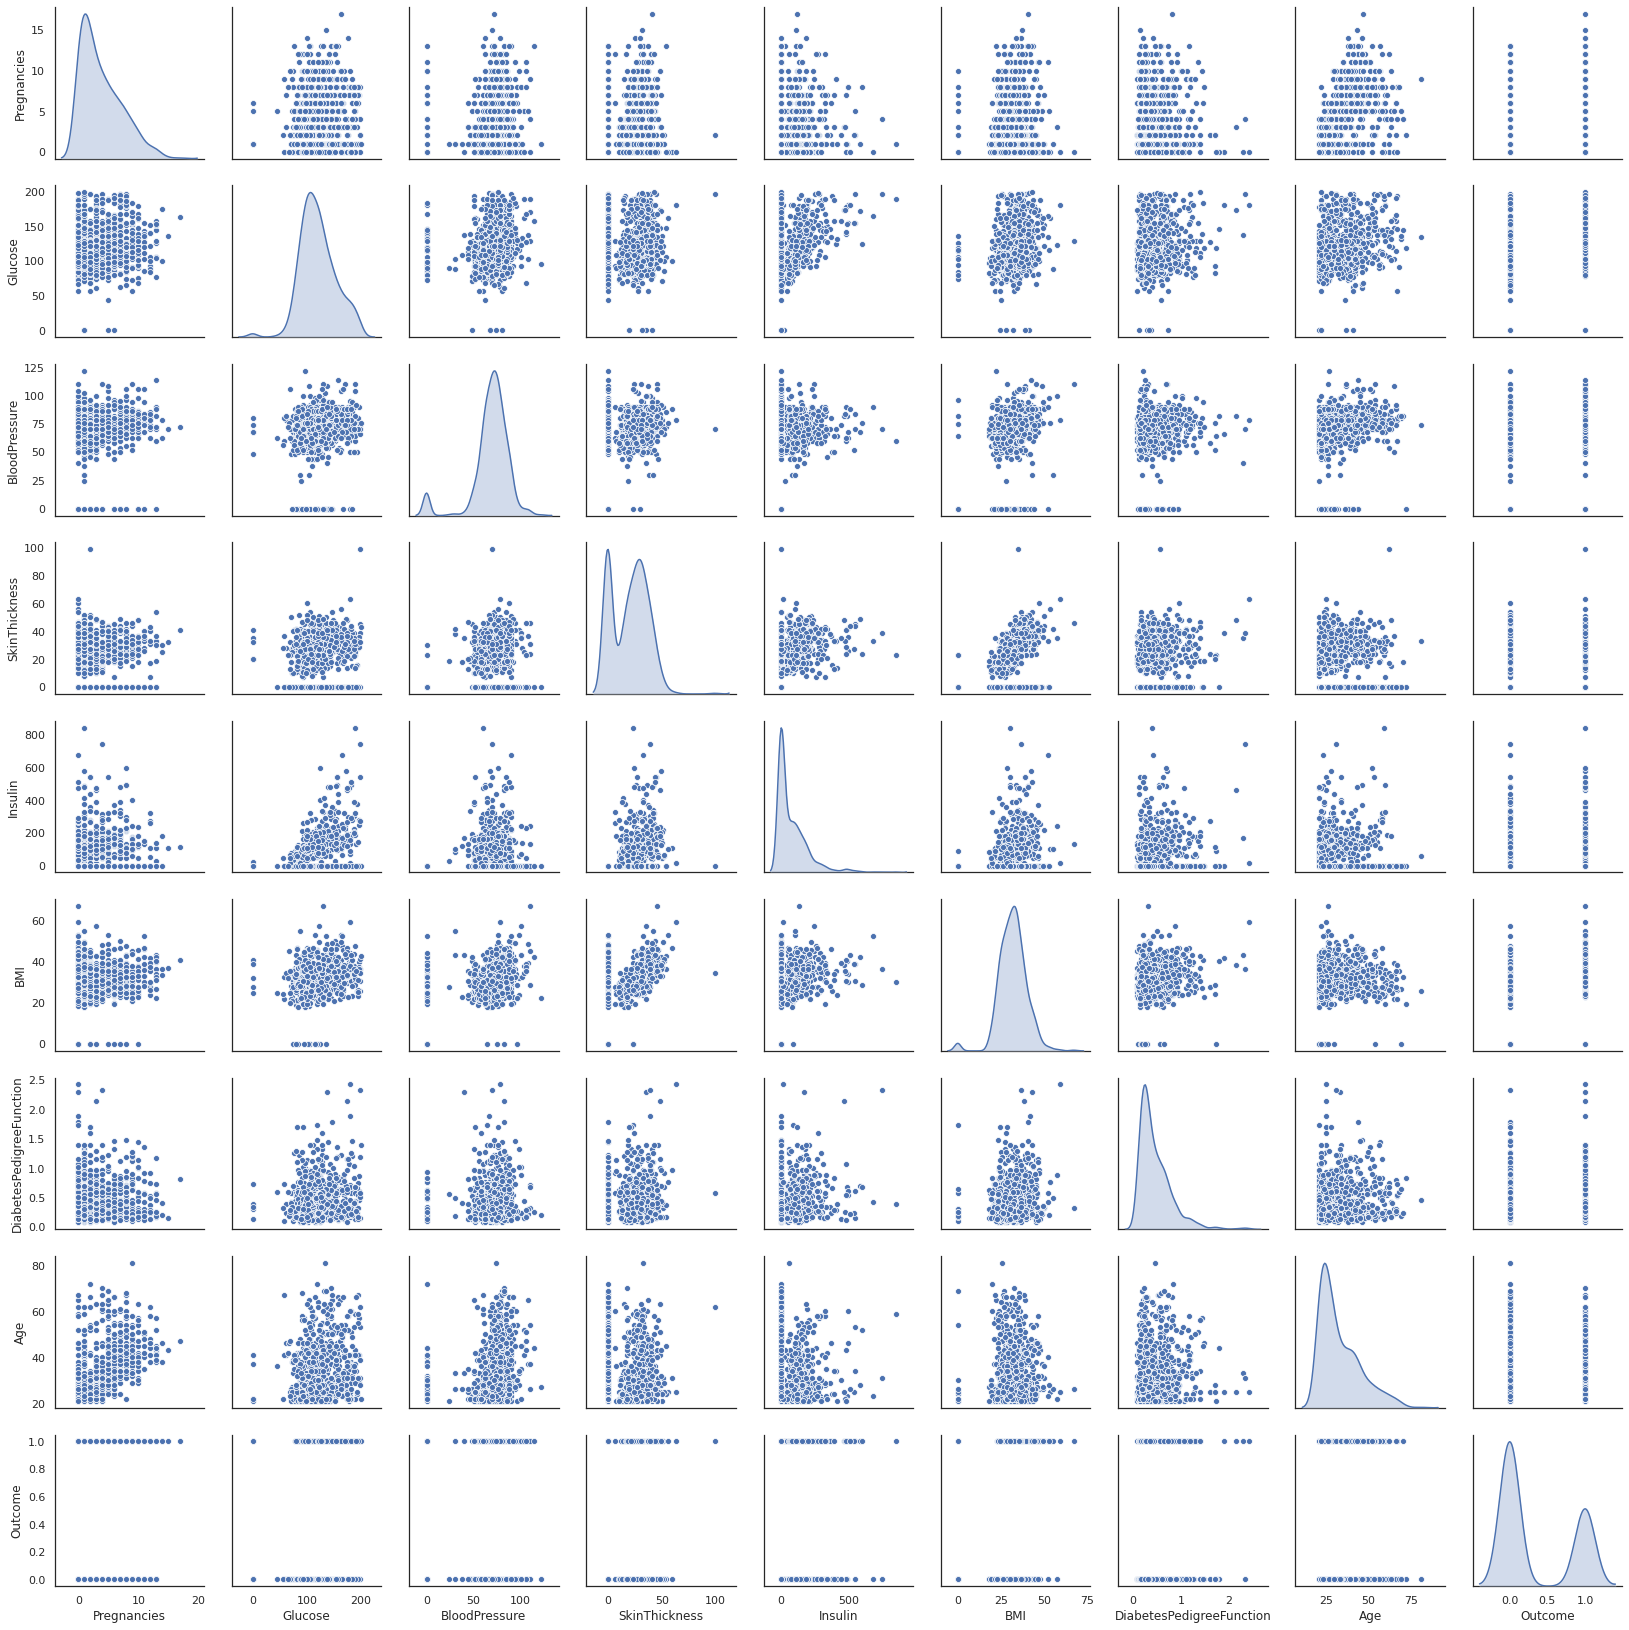

In [ ]:
# https://python-graph-gallery.com/111-custom-correlogram/
import seaborn as sns
import matplotlib.pyplot as plt

df = pima
 
# Density
sns.pairplot(df, diag_kind="kde")
 
# Histogram
sns.pairplot(df, diag_kind="hist")
 
# You can custom it as a density plot or histogram so see the related sections
sns.pairplot(df, diag_kind="kde", diag_kws=dict(shade=True, bw=.05, vertical=False) )


### Practice 1: Data exploration on diabetes patients
- Make a new dataframe having only patients with diabetes and remove the Outcome variable.
- Plot the correlation matrix and correlogram of the new dataset.
- Identify the three variables more correlated to Insulin.


In [ ]:
## Select only patients with diabetes 


In [ ]:
## Remove the Outcome variable


In [ ]:
## Print dataframe info


In [ ]:
## Plot the correlation matrix


In [ ]:
## Plot the correlogram


#### The three variables with the highest correlation with Insulin are: 
- 
- 
- 

## Simple Linear Regression

In [ ]:
df_2 = pima[pima['Outcome']==1.0];
df_2 = df_2.iloc[:, 0:-1]

In [ ]:
import statsmodels.api as sm

## Build a simple linear regression model where the Insulin level is explained by the Glucose level of the patient.

independent = 'Glucose'
feature_cols = [independent]
X = df_2[feature_cols] # Features (independent variables)
y = df_2.Insulin # Target variable

## Add intercept/constant
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Insulin   R-squared:                       0.068
Model:                            OLS   Adj. R-squared:                  0.065
Method:                 Least Squares   F-statistic:                     19.50
Date:                Tue, 06 Apr 2021   Prob (F-statistic):           1.46e-05
Time:                        20:06:34   Log-Likelihood:                -1692.1
No. Observations:                 268   AIC:                             3388.
Df Residuals:                     266   BIC:                             3395.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -59.9798     37.214     -1.612      0.108    -133.251      13.292
Glucose        1.1349      0.257      4.416      0.000       0.629       1.641
==============================================================================
Omnibus:                       92.767   Durbin-Watson:                   2.036
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              254.373
Skew:                           1.578   Prob(JB):                     5.80e-56
Kurtosis:                       6.581   Cond. No.                         658.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Answer the following questions:
- Are the intercept and the Insulin coefficient significants?
- What is the problem of using a model with a not significant coefficient?

In [ ]:
## Remove the intercept
independent = 'Glucose'
feature_cols = [independent]
X = df_2[feature_cols] # Features (independent variables)
y = df_2.Insulin # Target variable

#X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                Insulin   R-squared (uncentered):                   0.383
Model:                            OLS   Adj. R-squared (uncentered):              0.381
Method:                 Least Squares   F-statistic:                              165.9
Date:                Tue, 06 Apr 2021   Prob (F-statistic):                    7.50e-30
Time:                        20:06:34   Log-Likelihood:                         -1693.4
No. Observations:                 268   AIC:                                      3389.
Df Residuals:                     267   BIC:                                      3392.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Glucose        0.7309      0.057     12.880      0.000       0.619       0.843
==============================================================================
Omnibus:                      102.632   Durbin-Watson:                   2.026
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              307.859
Skew:                           1.716   Prob(JB):                     1.41e-67
Kurtosis:                       6.973   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Answer the following questions:
- To which extent Insulin explains the Glucose level? 
- How much error has the model?
- Is this model better than the previous one?
- Which is the equation of the linear model?

### Residual plots

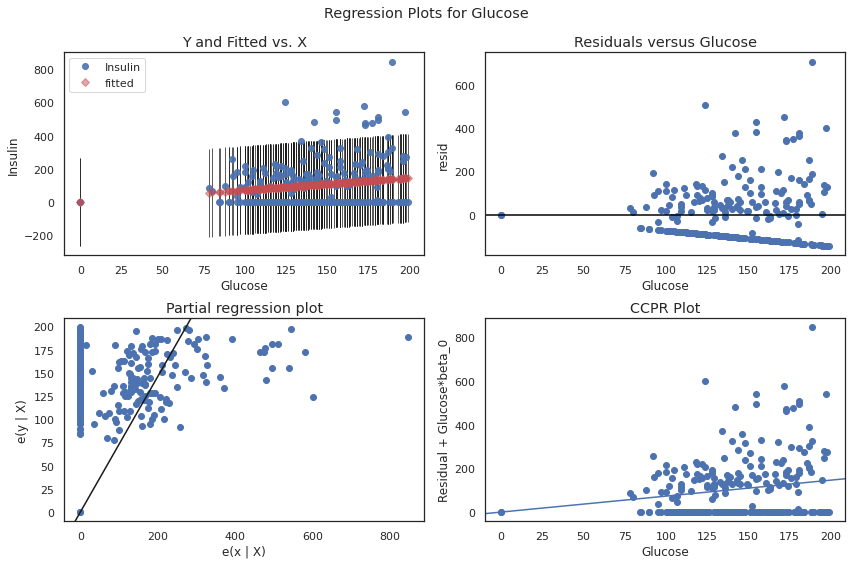

In [ ]:
## Plot the residuals for the model
## https://www.statsmodels.org/v0.10.2/generated/statsmodels.graphics.regressionplots.plot_regress_exog.html
## https://www.statsmodels.org/devel/examples/notebooks/generated/regression_plots.html

#define figure size
fig = plt.figure(figsize=(12,8))

#produce regression plots
fig = sm.graphics.plot_regress_exog(model, independent, fig=fig)

#### Answer the following questions:
- Does the model shows homocedasticity?

### Practice 2: Single Regression models
- Train other four single regression models (BMI, Age, SkinThickness, DiabetesPedigreeFunction)
- Plot residuals for each model
- Choose the best model


In [ ]:
## Train the model using BMI to predict Insulin.


In [ ]:
## Plot residuals of the model that uses BMI to predict Insulin.


In [ ]:
## Train the model using Age to predict Insulin.


In [ ]:
## Plot residuals of the model that uses Age to predict Insulin.


In [ ]:
## Train the model using SkinThickness to predict Insulin.


In [ ]:
## Plot residuals of the model that uses SkinThickness to predict Insulin.


In [ ]:
## Train the model using DiabetesPedigreeFunction to predict Insulin.


In [ ]:
## Plot residuals of the model that uses DiabetesPedigreeFunction to predict Insulin.


#### The best model is the one that uses __ to predict Insulin. Its R2 is __ and all its coefficients are significant.

## Multiple Linear Regression

In [ ]:
## Build a multiple linear regression model with all the variables.
feature_cols = [ 'Glucose', 'BMI', 'Age','DiabetesPedigreeFunction','SkinThickness','Pregnancies','BloodPressure']

df_3 = df_2

X = df_3[feature_cols] # Features (independent variables)
y = df_3.Insulin # Target variable

In [ ]:
import statsmodels.api as sm
X = sm.add_constant(X)
est = sm.OLS(y, X).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Insulin   R-squared:                       0.284
Model:                            OLS   Adj. R-squared:                  0.265
Method:                 Least Squares   F-statistic:                     14.75
Date:                Tue, 06 Apr 2021   Prob (F-statistic):           3.56e-16
Time:                        20:06:35   Log-Likelihood:                -1656.8
No. Observations:                 268   AIC:                             3330.
Df Residuals:                     260   BIC:                             3358.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                      -62.1602     56.833     -1.094      0.275    -174.073      49.752
Glucose                      1.0458      0.231      4.527      0.000       0.591       1.501
BMI                         -1.9586      1.084     -1.807      0.072      -4.093       0.176
Age                          0.7957      0.784      1.015      0.311      -0.748       2.339
DiabetesPedigreeFunction    -8.9662     20.395     -0.440      0.661     -49.127      31.194
SkinThickness                3.8721      0.458      8.462      0.000       2.971       4.773
Pregnancies                 -2.5319      2.194     -1.154      0.250      -6.852       1.788
BloodPressure               -0.2042      0.367     -0.557      0.578      -0.926       0.518
==============================================================================
Omnibus:                       95.750   Durbin-Watson:                   2.026
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              492.256
Skew:                           1.354   Prob(JB):                    1.28e-107
Kurtosis:                       9.062   Cond. No.                     1.33e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.33e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Answer the following questions:
- Are all coefficients significant?
- Is there any evidence of multicollinearity?

### Eliminate multicollinearity

In [ ]:
## Reorder columns by setting Insulin as the last column
df_3 = df_3[['Glucose', 'BMI', 'Age','DiabetesPedigreeFunction','SkinThickness','Pregnancies','BloodPressure','Insulin']]


In [ ]:
## Identify collinearity of every predictor using VIF

from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

## Prints the VIF coefficient of the dataframe except for the last column.
## VIF > 10 indica alta multicolinearidad
def printVIF(df):
    for i in range(len(df.columns[:-1])):
        v = vif(np.matrix(df[:-1]),i)
        print("VIF for {}: {}".format(df.columns[i],round(v,2)))
    

In [ ]:
printVIF(df_3)

VIF for Glucose: 17.69
VIF for BMI: 18.12
VIF for Age: 15.28
VIF for DiabetesPedigreeFunction: 3.41
VIF for SkinThickness: 4.06
VIF for Pregnancies: 3.47
VIF for BloodPressure: 13.51


#### Answer the following questions:
- Which variables have a VIF higher than 10?
- Which variables with a high p-value should be removed?
- Which variables would VIF recommend to remove?

In [ ]:
# Remove BloodPressure
df_4 = df_3[['Glucose', 'BMI', 'Age','DiabetesPedigreeFunction','SkinThickness','Pregnancies','Insulin']]

printVIF(df_4)

VIF for Glucose: 17.34
VIF for BMI: 16.54
VIF for Age: 13.34
VIF for DiabetesPedigreeFunction: 3.41
VIF for SkinThickness: 3.9
VIF for Pregnancies: 3.46


In [ ]:
# Remove Glucose
df_4 = df_3[['BMI', 'Age','DiabetesPedigreeFunction','SkinThickness','Pregnancies','Insulin']]

printVIF(df_4)

VIF for BMI: 10.62
VIF for Age: 10.91
VIF for DiabetesPedigreeFunction: 3.37
VIF for SkinThickness: 3.83
VIF for Pregnancies: 3.45


#### Answer the following questions:
- Why all VIF coefficients change when a feature is removed?
- Could we train a model without multicollinearity with these 5 variables?

In [ ]:
feature_cols = ['BMI', 'Age','DiabetesPedigreeFunction','SkinThickness','Pregnancies']
X = df_4[feature_cols] # Features (independent variables)
y = df_4.Insulin # Target variable

X = sm.add_constant(X)
est = sm.OLS(y, X).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Insulin   R-squared:                       0.227
Model:                            OLS   Adj. R-squared:                  0.213
Method:                 Least Squares   F-statistic:                     15.42
Date:                Tue, 06 Apr 2021   Prob (F-statistic):           2.73e-13
Time:                        20:06:35   Log-Likelihood:                -1667.1
No. Observations:                 268   AIC:                             3346.
Df Residuals:                     262   BIC:                             3368.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       55.4586     50.487      1.098      0.273     -43.953     154.870
BMI                         -1.7902      1.112     -1.610      0.109      -3.979       0.399
Age                          1.1787      0.775      1.522      0.129      -0.346       2.704
DiabetesPedigreeFunction    -7.0214     21.103     -0.333      0.740     -48.574      34.531
SkinThickness                3.8583      0.463      8.339      0.000       2.947       4.769
Pregnancies                 -3.6079      2.257     -1.599      0.111      -8.052       0.836
==============================================================================
Omnibus:                      107.512   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              499.093
Skew:                           1.596   Prob(JB):                    4.20e-109
Kurtosis:                       8.874   Cond. No.                         384.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Answer the following questions:
- Do we still have multicollinearity?
- Are all coefficients significants?
- Is the intercept significant?
- Which variable should we remove next?

In [ ]:
## Remove the DiabetesPedigreeFunction
feature_cols = ['BMI', 'Age','SkinThickness','Pregnancies']
X = df_4[feature_cols] # Features (independent variables)
y = df_4.Insulin # Target variable

X = sm.add_constant(X)
est = sm.OLS(y, X).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Insulin   R-squared:                       0.227
Model:                            OLS   Adj. R-squared:                  0.215
Method:                 Least Squares   F-statistic:                     19.31
Date:                Tue, 06 Apr 2021   Prob (F-statistic):           6.07e-14
Time:                        20:06:35   Log-Likelihood:                -1667.1
No. Observations:                 268   AIC:                             3344.
Df Residuals:                     263   BIC:                             3362.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            52.5139     49.621      1.058      0.291     -45.191     150.219
BMI              -1.8066      1.109     -1.629      0.104      -3.990       0.376
Age               1.1899      0.773      1.540      0.125      -0.331       2.711
SkinThickness     3.8208      0.448      8.529      0.000       2.939       4.703
Pregnancies      -3.5932      2.253     -1.595      0.112      -8.029       0.843
==============================================================================
Omnibus:                      107.886   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              501.934
Skew:                           1.602   Prob(JB):                    1.01e-109
Kurtosis:                       8.890   Cond. No.                         377.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
## Remove Pregnancies
feature_cols = ['BMI', 'SkinThickness','Age']
X = df_4[feature_cols] # Features (independent variables)
y = df_4.Insulin # Target variable

X = sm.add_constant(X)
est = sm.OLS(y, X).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Insulin   R-squared:                       0.220
Model:                            OLS   Adj. R-squared:                  0.211
Method:                 Least Squares   F-statistic:                     24.76
Date:                Tue, 06 Apr 2021   Prob (F-statistic):           3.80e-14
Time:                        20:06:35   Log-Likelihood:                -1668.4
No. Observations:                 268   AIC:                             3345.
Df Residuals:                     264   BIC:                             3359.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            49.5188     49.730      0.996      0.320     -48.400     147.437
BMI              -1.6714      1.109     -1.508      0.133      -3.854       0.512
SkinThickness     3.8336      0.449      8.534      0.000       2.949       4.718
Age               0.6633      0.700      0.947      0.345      -0.716       2.042
==============================================================================
Omnibus:                      114.650   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              570.984
Skew:                           1.692   Prob(JB):                    1.03e-124
Kurtosis:                       9.299   Cond. No.                         375.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
## Remove the intercept
feature_cols = ['BMI', 'SkinThickness','Age']
X = df_4[feature_cols] # Features (independent variables)
y = df_4.Insulin # Target variable

#X = sm.add_constant(X)
est = sm.OLS(y, X).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                Insulin   R-squared (uncentered):                   0.486
Model:                            OLS   Adj. R-squared (uncentered):              0.481
Method:                 Least Squares   F-statistic:                              83.66
Date:                Tue, 06 Apr 2021   Prob (F-statistic):                    4.12e-38
Time:                        20:06:35   Log-Likelihood:                         -1668.9
No. Observations:                 268   AIC:                                      3344.
Df Residuals:                     265   BIC:                                      3355.
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
BMI              -0.7761      0.649     -1.197      0.233      -2.053       0.501
SkinThickness     3.8259      0.449      8.518      0.000       2.942       4.710
Age               1.1244      0.525      2.140      0.033       0.090       2.159
==============================================================================
Omnibus:                      111.599   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              547.618
Skew:                           1.644   Prob(JB):                    1.22e-119
Kurtosis:                       9.183   Cond. No.                         6.20
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
## Remove the BMI
feature_cols = ['SkinThickness','Age']
X = df_4[feature_cols] # Features (independent variables)
y = df_4.Insulin # Target variable

#X = sm.add_constant(X)
est = sm.OLS(y, X).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                Insulin   R-squared (uncentered):                   0.484
Model:                            OLS   Adj. R-squared (uncentered):              0.480
Method:                 Least Squares   F-statistic:                              124.6
Date:                Tue, 06 Apr 2021   Prob (F-statistic):                    6.63e-39
Time:                        20:06:35   Log-Likelihood:                         -1669.6
No. Observations:                 268   AIC:                                      3343.
Df Residuals:                     266   BIC:                                      3350.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
SkinThickness     3.5618      0.392      9.098      0.000       2.791       4.333
Age               0.5975      0.287      2.082      0.038       0.032       1.163
==============================================================================
Omnibus:                      118.886   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              603.813
Skew:                           1.759   Prob(JB):                    7.65e-132
Kurtosis:                       9.457   Cond. No.                         2.72
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Answer the following questions:
- Is this model significant?
- Can we use it to predict the insulin level?
- How is the equation of the model?
- Go back and check how error evolves

### Feature selection with Recursive Feature Elimination (RFE)

In [ ]:
from sklearn.feature_selection import RFE

feature_cols = ['Glucose', 'BMI', 'Age','DiabetesPedigreeFunction','SkinThickness','Pregnancies','BloodPressure']
X = df_3[feature_cols] # Features (independent variables)
y = df_3.Insulin # Target variable
names=pd.DataFrame(X.columns)


In [ ]:
#use linear regression as the model
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()

In [ ]:
## Look for the best set with 2 features
rfe_mod = RFE(lin_reg, 2, step=1) 
myvalues=rfe_mod.fit(X,y) #to fit
#myvalues.support_#The mask of selected features.
#myvalues.ranking_
rankings=pd.DataFrame(myvalues.ranking_) #Make it into data frame

/home/adm_schiffler/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:67: FutureWarning: Pass n_features_to_select=2 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


In [ ]:
## Print the list of ranked variables. Selected feature will have a 1.
ranked=pd.concat([names,rankings], axis=1)
ranked.columns = ["Feature", "Rank"]
ranked

,Feature,Rank
0,Glucose,4
1,BMI,3
2,Age,5
3,DiabetesPedigreeFunction,1
4,SkinThickness,1
5,Pregnancies,2
6,BloodPressure,6


In [ ]:
#Select most important (Only 1's)
most_important = ranked.loc[ranked['Rank'] ==1] 
print(most_important)

most_important['Rank'].count()

                    Feature  Rank
3  DiabetesPedigreeFunction     1
4             SkinThickness     1


2

In [ ]:
## Build the multiple linear regression model with the selected variables
feature_cols = ['DiabetesPedigreeFunction','SkinThickness']
X = df_3[feature_cols] # Features (independent variables)
y = df_3.Insulin # Target variable

X = sm.add_constant(X)
est = sm.OLS(y, X).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Insulin   R-squared:                       0.209
Model:                            OLS   Adj. R-squared:                  0.203
Method:                 Least Squares   F-statistic:                     35.02
Date:                Tue, 06 Apr 2021   Prob (F-statistic):           3.20e-14
Time:                        20:06:36   Log-Likelihood:                -1670.2
No. Observations:                 268   AIC:                             3346.
Df Residuals:                     265   BIC:                             3357.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       24.9522     15.079      1.655      0.099      -4.739      54.643
DiabetesPedigreeFunction    -9.4573     21.158     -0.447      0.655     -51.116      32.202
SkinThickness                3.6360      0.446      8.160      0.000       2.759       4.513
==============================================================================
Omnibus:                      121.261   Durbin-Watson:                   1.992
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              636.307
Skew:                           1.788   Prob(JB):                    6.72e-139
Kurtosis:                       9.648   Cond. No.                         88.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Answer the following questions:
- RFE recommends the same two features?
- Are all the coefficients of the RFE model significant?
- Which of these two models is the best (according to R2 and F-statistic)?
- Which criteria followed RFE to guide its search?

### Practice 3: Linear Multiple Regression
- Make a new feature selection using the VIF method.
- Build and validate a model with the 4 most correlated variables.
- Apply feature selection starting from all variables.
- Check if you get to the same model with the two methods.
- Describe the best model through a linear equation 
